### Edgar Moises Hernandez-Gonzalez
#### 29/03/20-02/04/20
#### Clasificacion de CIFAR10 con Fine Tunning usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 75.91%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2ec2955eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec2955a58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec298eb70> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2ec1911550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec18b4198> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec18c1208> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2ec18c96a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec18c9518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2ec18d3860> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2eb0009a20> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f2eb0013940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam(lr=1e-6)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=200, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
391/391 - 12s - loss: 2.2901 - accuracy: 0.1617 - val_loss: 2.1547 - val_accuracy: 0.2523
Epoch 2/200
391/391 - 11s - loss: 2.0469 - accuracy: 0.2906 - val_loss: 1.9101 - val_accuracy: 0.3701
Epoch 3/200
391/391 - 11s - loss: 1.8191 - accuracy: 0.3841 - val_loss: 1.6730 - val_accuracy: 0.4651
Epoch 4/200
391/391 - 11s - loss: 1.6471 - accuracy: 0.4490 - val_loss: 1.5180 - val_accuracy: 0.5111
Epoch 5/200
391/391 - 11s - loss: 1.5362 - accuracy: 0.4870 - val_loss: 1.4158 - val_accuracy: 0.5383
Epoch 6/200
391/391 - 11s - loss: 1.4526 - accuracy: 0.5125 - val_loss: 1.3402 - val_accuracy: 0.5595
Epoch 7/200
391/391 - 11s - loss: 1.3935 - accuracy: 0.5317 - val_loss: 1.2855 - val_accuracy: 0.5768
Epoch 8/200
391/391 - 11s - loss: 1.3429 - accuracy: 0.5509 - val_loss: 1.2419 - val_accuracy: 0.5885
Epoch 9/200
391/391 - 11s - loss: 1.3009 - accuracy: 0.5645 - val_loss: 1.2031 - val_accuracy: 0.5984
Epoch 10/200
391/391 - 11s - loss: 1.2658 - accuracy: 0.5741 - val_loss: 1.1731 - 

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.7154 - accuracy: 0.7591
Test loss: 0.7154025435447693
Test accuracy: 0.7591000199317932


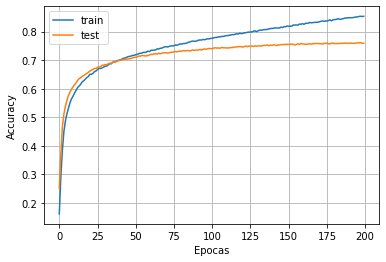

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

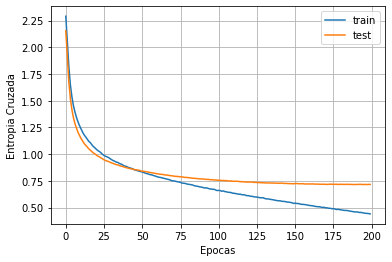

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[825  19  20  14  15   7   9   9  63  19]
 [ 18 849   6  11   3   7   7   2  25  72]
 [ 50   3 681  52  81  36  64  18   5  10]
 [ 15  18  56 602  46 136  70  24  14  19]
 [ 20   6  56  49 718  27  56  46  15   7]
 [  9   4  35 183  38 653  26  39   1  12]
 [  8   6  35  50  41  35 806   3  10   6]
 [ 16   2  26  40  63  49   6 781   3  14]
 [ 42  18  13  11  11   2   4   2 875  22]
 [ 26  76   9  21   9   7   5  14  32 801]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.85      0.85      0.85      1000
           2       0.73      0.68      0.70      1000
           3       0.58      0.60      0.59      1000
           4       0.70      0.72      0.71      1000
           5       0.68      0.65      0.67      1000
           6       0.77      0.81      0.79      1000
           7       0.83      0.78      0.81      1000
           8       0.84      0.88      0.86      1000
           9       0.82      0.80      0.81      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

